In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet, BayesianRidge
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [7]:
df = pd.read_csv("/content/drive/My Drive/diamonds.csv", index_col=0)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


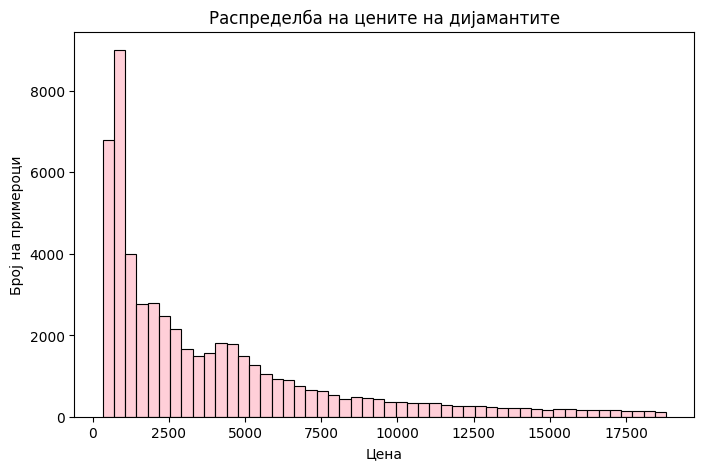

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, color='pink')
plt.xlabel("Цена")
plt.ylabel("Број на примероци")
plt.title("Распределба на цените на дијамантите")
plt.show()


In [6]:
df.head(15)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [7]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [8]:
df.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [9]:
ordinal_enc = OrdinalEncoder(categories=[
    ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
    ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
    ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
])
df[['cut', 'color', 'clarity']] = ordinal_enc.fit_transform(df[['cut', 'color', 'clarity']])

In [10]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,4.0,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3.0,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1.0,5.0,4.0,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1.0,0.0,1.0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,4.0,6.0,2.0,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,1.0,6.0,2.0,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,2.0,6.0,2.0,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,3.0,2.0,1.0,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
X = df.drop(['price'], axis=1)
y = df['price']
X = df.drop(['price'], axis=1)
y = df['price']

feature_names = df.columns.tolist()
number_of_features = df.shape[1]
number_of_instances = df.shape[0]

print("Број и имиња на атрибути:", number_of_features, feature_names)
print("Број на податочни примероци:", number_of_instances)

Број и имиња на атрибути: 10 ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
Број на податочни примероци: 53940


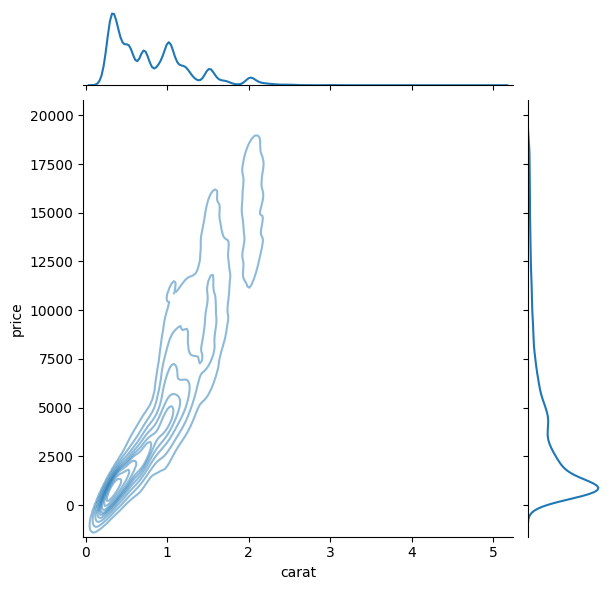

In [8]:
sns.jointplot(data=df, x="carat", y="price", kind="kde", alpha=0.5)

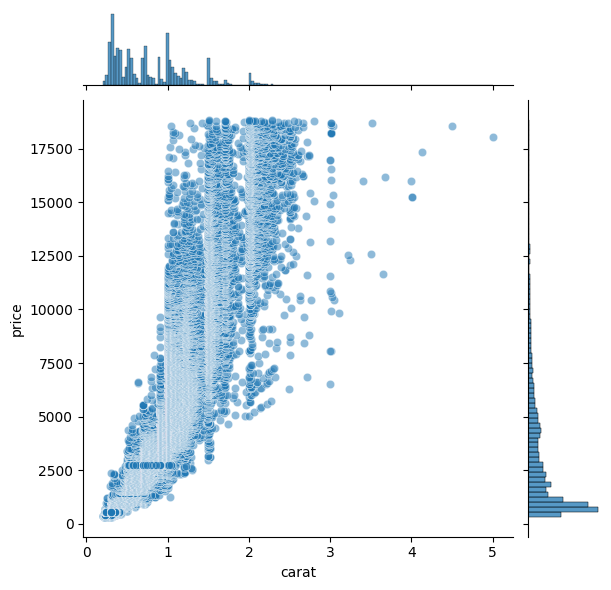

In [ ]:
sns.jointplot(data=df, x="carat", y="price", kind="scatter", alpha=0.5)

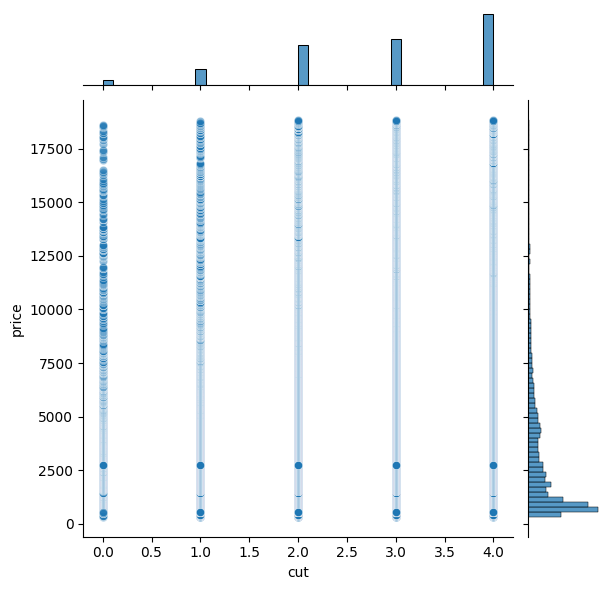

In [ ]:
sns.jointplot(data=df, x="cut", y="price", kind="scatter", alpha=0.5)


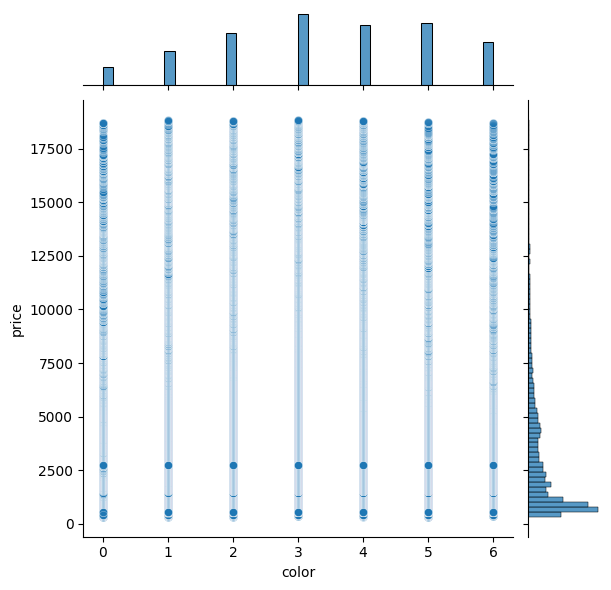

In [ ]:
sns.jointplot(data=df, x="color", y="price", kind="scatter", alpha=0.5)


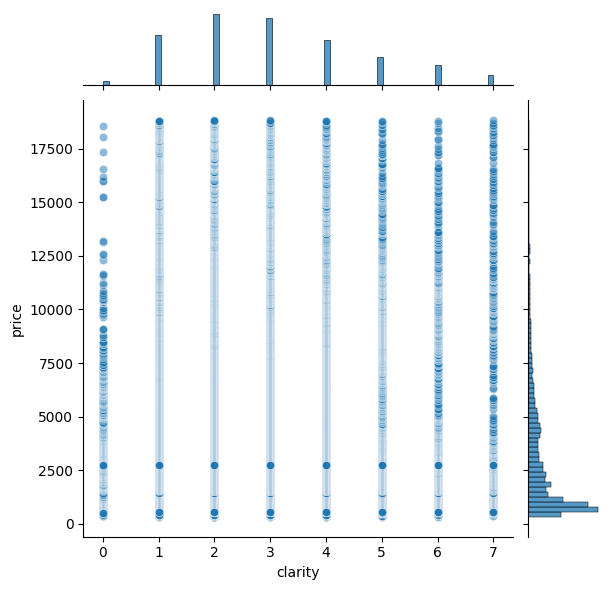

In [ ]:
sns.jointplot(data=df, x="clarity", y="price", kind="scatter", alpha=0.5)


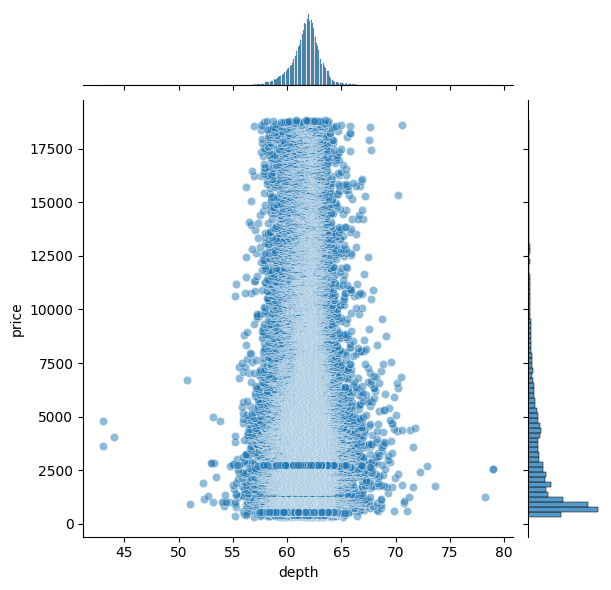

In [ ]:
sns.jointplot(data=df, x="depth", y="price", kind="scatter", alpha=0.5)


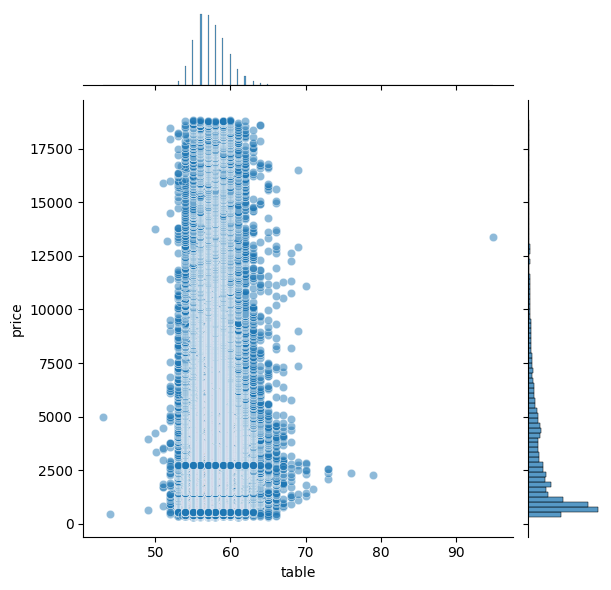

In [ ]:
sns.jointplot(data=df, x="table", y="price", kind="scatter", alpha=0.5)


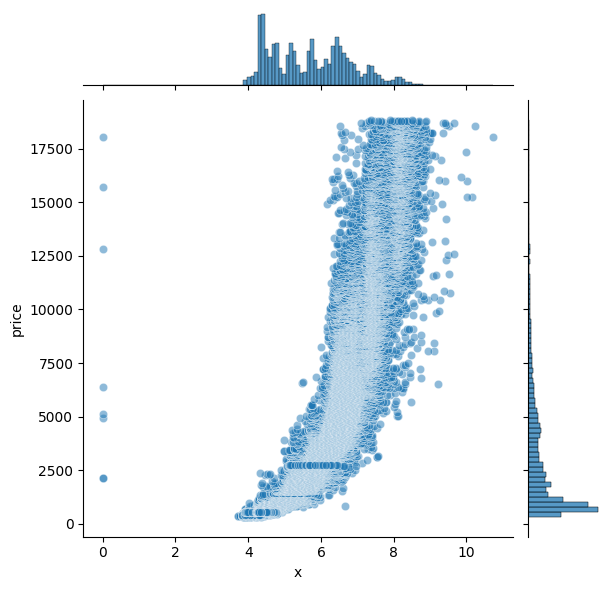

In [ ]:
sns.jointplot(data=df, x="x", y="price", kind="scatter", alpha=0.5)


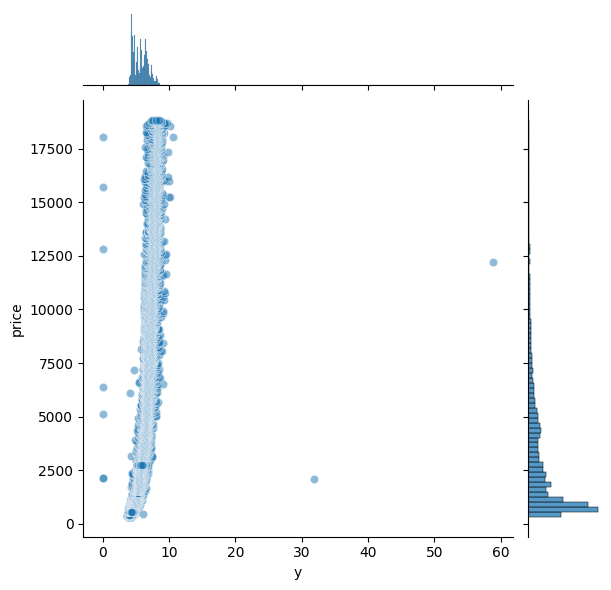

In [ ]:
sns.jointplot(data=df, x="y", y="price", kind="scatter", alpha=0.5)


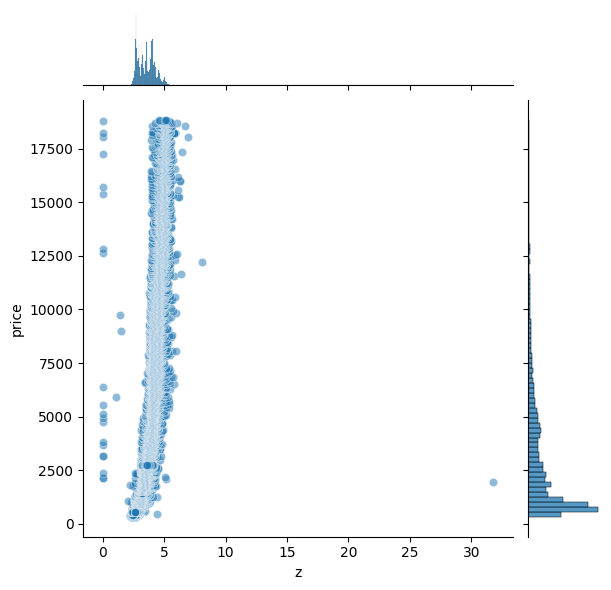

In [ ]:
sns.jointplot(data=df, x="z", y="price", kind="scatter", alpha=0.5)


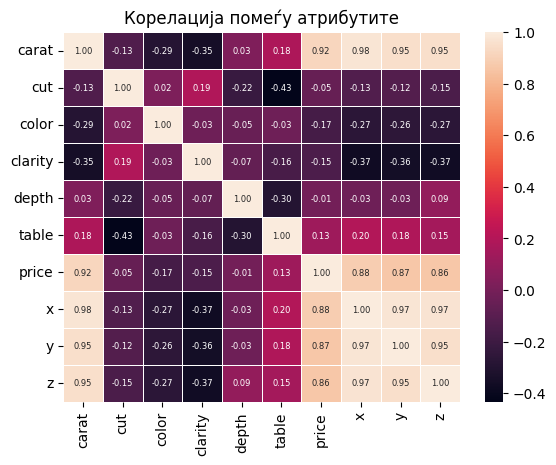

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="rocket", fmt=".2f", linewidths=0.5, annot_kws={"size": 6})
plt.title("Корелација помеѓу атрибутите")
plt.show()


LinearRegression Средна квадратна грешка: 1201.207731751761
LinearRegression Точност: 0.907482469546913
LinearRegression Пресек W0: 1186.3182672673506
LinearRegression Коефициенти W: [51454.14203684   482.08529118  1944.76684572  3528.65730016
 -2831.25902261 -1430.41686286 -9047.60739108  1491.9238829
  -753.02076314]
LinearRegression R² коефициент: 0.907482469546913



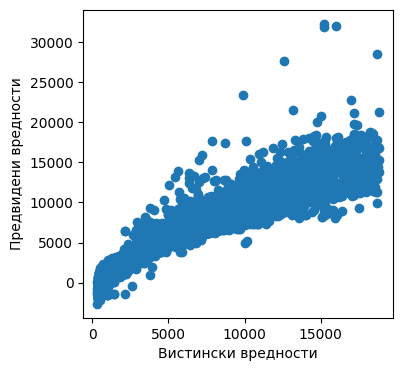

RidgeCV Средна квадратна грешка: 1204.0125324315945
RidgeCV Точност: 0.9070499112446307
RidgeCV Пресек W0: -282.67675407486513
RidgeCV Коефициенти W: [48264.88858249   487.39082663  1917.61345591  3547.51885165
 -2316.79242748 -1330.1585819  -5856.68643492   337.54528686
  -908.38942753]
RidgeCV R² коефициент: 0.9070499112446307
RidgeCV Хипер-параметарот alpha : 1.0



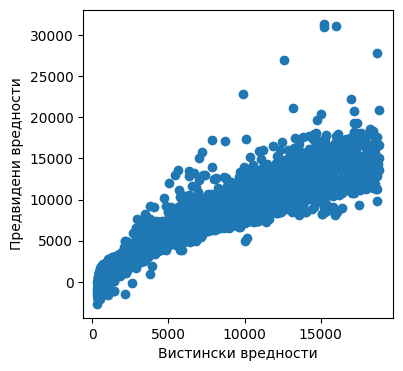

LassoCV Средна квадратна грешка: 1202.4537616815596
LassoCV Точност: 0.9072904304856908
LassoCV Пресек W0: 63.802573225444576
LassoCV Коефициенти W: [49704.23842693   518.17408504  1931.05000485  3543.92553585
 -2215.78167658  -986.8266165  -7299.89192108    -0.
    -0.        ]
LassoCV R² коефициент: 0.9072904304856908
LassoCV Хипер-параметарот alpha : 0.3704174011089428



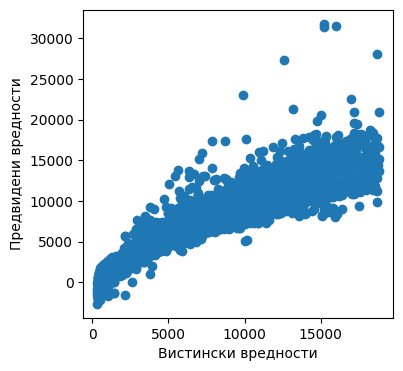

BayesianRidge Средна квадратна грешка: 1201.2135637640386
BayesianRidge Точност: 0.9074815711765994
BayesianRidge Пресек W0: 1178.291150636419
BayesianRidge Коефициенти W: [51436.88992683   482.1094425   1944.62465784  3528.7704725
 -2828.32399704 -1429.93927922 -9028.08179787  1476.41667489
  -756.47888669]
BayesianRidge R² коефициент: 0.9074815711765994
BayesianRidge Хипер-параметарот alpha : 6.682938032256768e-07



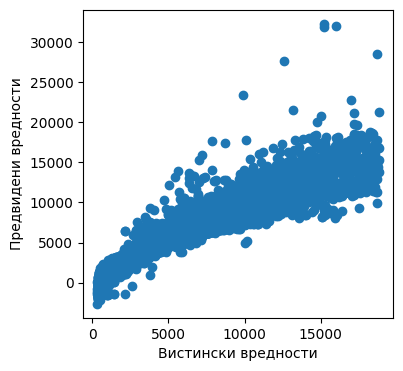

ElasticNet Средна квадратна грешка: 1201.4787665033505
ElasticNet Точност: 0.9074407144130173
ElasticNet Пресек W0: 909.515354919723
ElasticNet Коефициенти W: [50988.32397211   491.51440082  1941.016937    3532.77662002
 -2707.64856509 -1314.89688701 -8498.20208154     0.
    -0.        ]
ElasticNet R² коефициент: 0.9074407144130173

ElasticNet Хипер-параметар alpha: 0.1


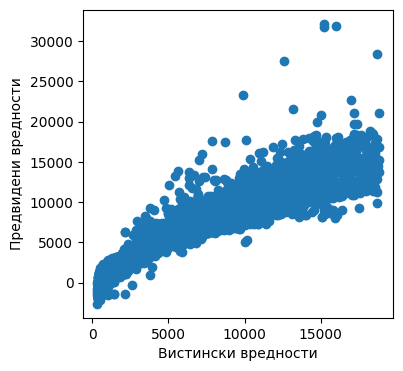

In [ ]:

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=42)

models = [LinearRegression(), RidgeCV(), LassoCV(), BayesianRidge(),ElasticNet(alpha=0.1, l1_ratio=1.0)]
results = []
mse = []

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{model.__class__.__name__} Средна квадратна грешка: {mean_squared_error(y_test, y_pred)** 0.5}")
    print(f"{model.__class__.__name__} Точност: {model.score(x_test, y_test)}")
    print(f"{model.__class__.__name__} Пресек W0: {model.intercept_}")
    print(f"{model.__class__.__name__} Коефициенти W: {model.coef_}")
    print(f"{model.__class__.__name__} R² коефициент: {r2_score(y_test, y_pred)}")
    results.append(model.score(x_test, y_test))
    mse.append(mean_squared_error(y_test, y_pred)** 0.5)
    if "alpha_" in model.__dict__:
        print(f"{model.__class__.__name__} Хипер-параметарот alpha : {model.alpha_}")
    print()
    if hasattr(model, "alpha"):
      print(f"{model.__class__.__name__} Хипер-параметар alpha: {model.alpha}")

    plt.figure(figsize=(4, 4))
    plt.scatter(y_test,y_pred)
    plt.xlabel("Вистински вредности")
    plt.ylabel("Предвидени вредности")
    plt.show()



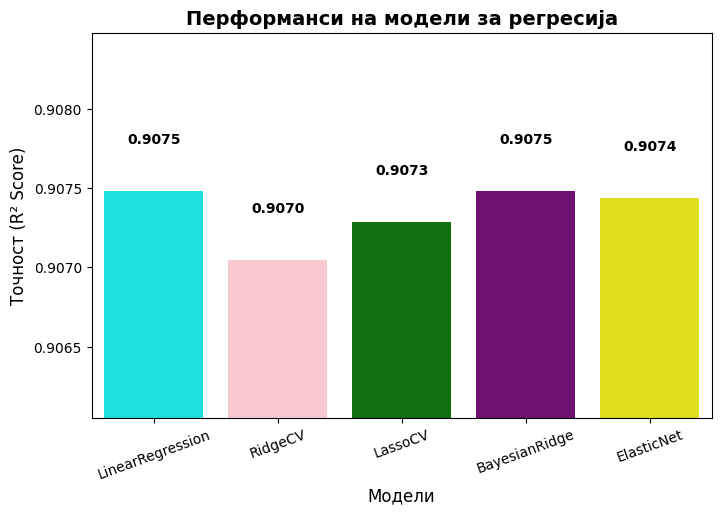

In [ ]:
names = ['LinearRegression', 'RidgeCV', 'LassoCV', 'BayesianRidge', 'ElasticNet']
colors = ['cyan', 'pink', 'green', 'purple', 'yellow']

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=names, y=results, hue=names, palette=colors, legend=False)

for i, v in enumerate(results):
    ax.text(i, v + 0.0003, f"{v:.4f}", ha='center', fontsize=10, fontweight='bold')

plt.ylim(min(results) - 0.001, max(results) + 0.001)
plt.xlabel("Модели", fontsize=12)
plt.ylabel("Точност (R² Score)", fontsize=12)
plt.title("Перформанси на модели за регресија", fontsize=14, fontweight="bold")
plt.xticks(rotation=20)


plt.show()


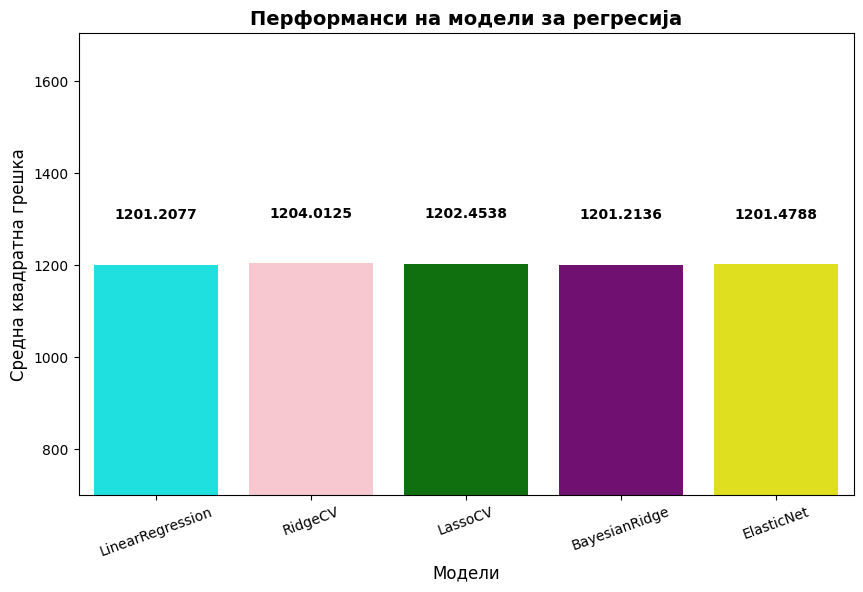

In [ ]:
names = ['LinearRegression', 'RidgeCV', 'LassoCV', 'BayesianRidge', 'ElasticNet']
colors = ['cyan', 'pink', 'green', 'purple', 'yellow']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=names, y=mse, hue=names, palette=colors, legend=False)

for i, v in enumerate(mse):
    ax.text(i, v + 100, f"{v:.4f}", ha='center', fontsize=10, fontweight='bold')

plt.ylim(min(mse) - 500, max(mse) + 500)

plt.xlabel("Модели", fontsize=12)
plt.ylabel("Средна квадратна грешка", fontsize=12)
plt.title("Перформанси на модели за регресија", fontsize=14, fontweight="bold")

plt.xticks(rotation=20)

plt.show()


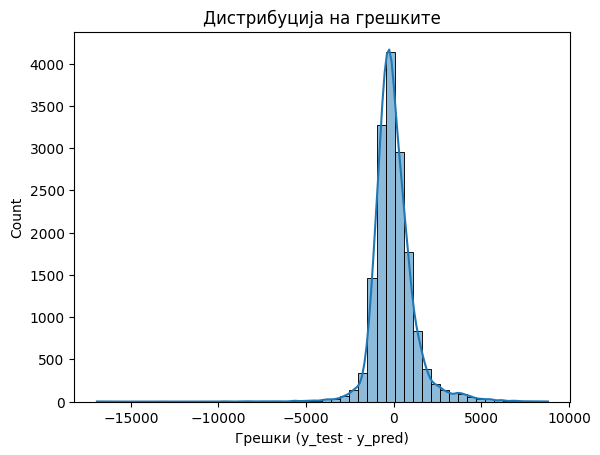

In [ ]:
errors = y_test - y_pred
sns.histplot(errors, bins=50, kde=True)
plt.xlabel("Грешки (y_test - y_pred)")
plt.title("Дистрибуција на грешките")
plt.show()


# Заклучок


**LinearRegression**:

Основниот модел на линеарна регресија покажува добра точност од околу 90.75% што значи добро се справува со предвидувањето на цената на дијамантите кои ги нема видено претходно.


**RidgeCV**:

Резултатите на овој модел се многу слични со резултатите на LinearRegression.
RidgeCV има малку поголема MSE, но и понатаму има висока точност 90.70% и добар R² коефициент 0.9070. Регуларизацијата во овој случај е применета со употреба на хипер-параметарот alpha кој е 1.0, што значи дека не се прави некоја огромна регуларизација.

**LassoCV**:

LassoCV дава слични резултати како и моделите RidgeCV и LinearRegression. Сепак во овој модел некои коефициенти се нула (како на пример коефициентите на последните 2 атрибути) што значи дека моделот користи L1 регуларизација за да ги тргне атрибутите кои немаат некое големо влијание врз тренирањето на моделот.


**BayesianRidge**:

BayesianRidge постигнува речиси исти резултати како и претходните модели.Овде е карактеристична многу ниската вредност на alpha параметарот што укажува на тоа дека моделот не наметнува некоја силна регулација на коефициентите и има поголема слобода да се прилагоди на податоците.

**ElasticNet**

ElasticNet моделот прави комбинација на L1 и L2 регуларизација и како што се гледа по резултатите е многу сличен со LassoCV и RidgeCV.
Моделот изгледа добро избалансиран и дава релевантни резултати.
